In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
tf.random.set_seed(0)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-v_arlf45 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# MNIST
MNIST는 손으로 쓴 숫자들로 이루어진 데이터이다. 60000개의 학습 데이터와 10000개의 테스트 데이터로 구성되어 있으며, 하나의 입력은 $28 \times 28$ 픽셀의 크기를 갖는다.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


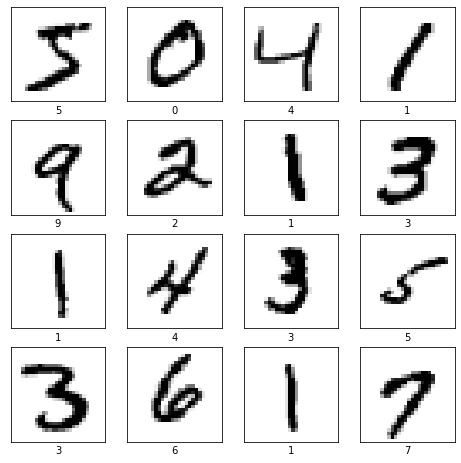

In [3]:
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Fully Connected Network (FCN)
FCN은 한층의 모든 뉴런이 직전 층의 모든 뉴런과 연결되어 있는 `Dense` 레이어만을 이용하여 구성한 네트워크이다.

## 모델 구성

In [4]:
fcn = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
fcn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fcn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 학습

In [5]:
fcn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3068 - accuracy: 0.8512
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3635 - accuracy: 0.9096
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2724 - accuracy: 0.9290
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2481 - accuracy: 0.9361
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2283 - accuracy: 0.9434


## 검증

In [6]:
test_loss, test_acc = fcn.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 716us/step - loss: 0.2629 - accuracy: 0.9399
Test loss: 0.26289358735084534
Test accuracy: 0.9398999810218811


## 시각화

In [7]:
n_rows = 5
n_cols = 3
n_images = n_rows * n_cols

In [8]:
predictions = fcn.predict(x_test[:n_images])

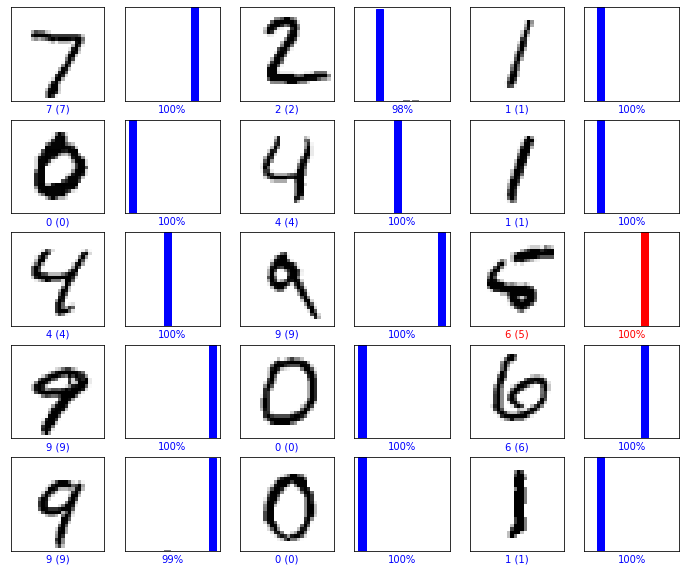

In [9]:
plt.figure(figsize=(4 * n_cols, 2 * n_rows))
for i in range(n_images):
    # plot image
    plt.subplot(n_rows, 2 * n_cols, 2 * i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    pred = np.argmax(predictions[i])
    ground_truth = y_test[i]
    plt.xlabel(f'{pred} ({ground_truth})',
               color='blue' if pred == ground_truth else 'red')
    # plot prediction
    plt.subplot(n_rows, 2 * n_cols, 2 * i + 2)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, 1)
    prob = predictions[i]
    bars = plt.bar(range(10), prob, color='grey')
    bars[pred].set_color('red')
    bars[ground_truth].set_color('blue')
    plt.xlabel(f'{100 * np.max(prob):.0f}%',
               color='blue' if pred == ground_truth else 'red')
plt.show()

# Convolutional Neural Network (CNN)
CNN은 동물의 시각 피질 영감을 받아 디자인된 네트워크로, 하나의 뉴런은 입력의 전체가 아닌 특정부분을 보고 출력을 계산하는 층들로 구성되었다.

## 모델 구성

In [10]:
cnn = keras.Sequential([
    keras.layers.Conv2D(6, kernel_size=3, strides=1, activation='relu', input_shape=(28, 28, 1), padding='same'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=3, strides=1, activation='relu', padding='same'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## 학습

In [11]:
cnn.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2483 - accuracy: 0.9487
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9820
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0416 - accuracy: 0.9869
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0289 - accuracy: 0.9907


## 검증

In [12]:
test_loss, test_acc = cnn.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=2)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

313/313 - 1s - loss: 0.0525 - accuracy: 0.9846
Test loss: 0.0524873360991478
Test accuracy: 0.9846000075340271


## 시각화

In [13]:
n_rows = 5
n_cols = 3
n_images = n_rows * n_cols

In [14]:
predictions = cnn.predict((x_test[:n_images]).reshape(-1, 28, 28, 1))

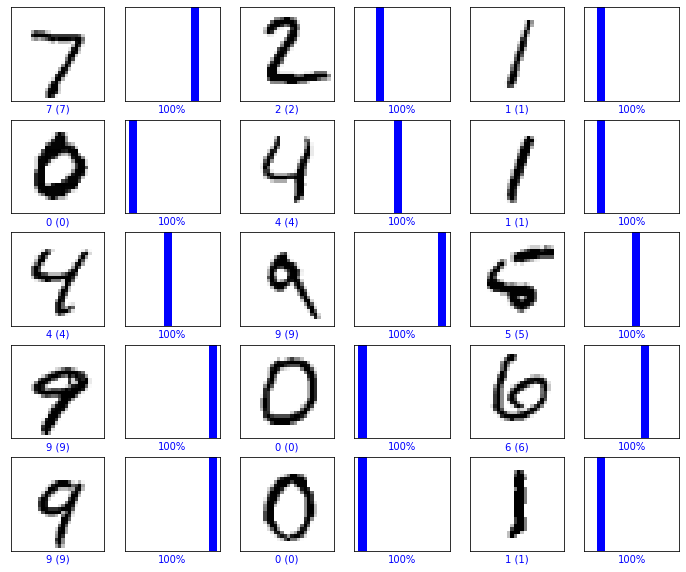

In [15]:
plt.figure(figsize=(4 * n_cols, 2 * n_rows))
for i in range(n_images):
    # plot image
    plt.subplot(n_rows, 2 * n_cols, 2 * i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    pred = np.argmax(predictions[i])
    ground_truth = y_test[i]
    plt.xlabel(f'{pred} ({ground_truth})',
               color='blue' if pred == ground_truth else 'red')
    # plot prediction
    plt.subplot(n_rows, 2 * n_cols, 2 * i + 2)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, 1)
    prob = predictions[i]
    bars = plt.bar(range(10), prob, color='grey')
    bars[pred].set_color('red')
    bars[ground_truth].set_color('blue')
    plt.xlabel(f'{100 * np.max(prob):.0f}%',
               color='blue' if pred == ground_truth else 'red')
plt.show()